In [1]:
# ==============================
# Importación Librerías
# ==============================

from funpymodeling.exploratory import status, freq_tbl
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
# ==============================
# Importación Data
# ==============================

ruta = r"C:\Users\USER\Desktop\Escuela de Datos Vivos\properati.csv"
df = pd.read_csv(ruta)

In [3]:
# ==============================
# Análisis Dataset
# ==============================

print("\n===Resumen de primer análisis del dataset===")
print(f"Número de filas: {df.shape[0]}")
print(f"Número de columnas: {df.shape[1]}")
print(f"Hay {df.duplicated().sum()} filas duplicadas")
print(f"En las columnas hay nulos?")
print(f"{df.isna().sum()}")


===Resumen de primer análisis del dataset===
Número de filas: 992192
Número de columnas: 25
Hay 0 filas duplicadas
En las columnas hay nulos?
id                      0
ad_type                 0
start_date              0
end_date                0
created_on              0
lat                153198
lon                152263
l1                      0
l2                      0
l3                  57455
l4                 766797
l5                 987481
l6                 992192
rooms              489147
bedrooms           601493
bathrooms          219171
surface_total      544028
surface_covered    555231
currency            47251
price_period       622253
title                  28
description            22
property_type           0
operation_type          0
price               44381
dtype: int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992192 entries, 0 to 992191
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               992192 non-null  int64  
 1   ad_type          992192 non-null  object 
 2   start_date       992192 non-null  object 
 3   end_date         992192 non-null  object 
 4   created_on       992192 non-null  object 
 5   lat              838994 non-null  float64
 6   lon              839929 non-null  float64
 7   l1               992192 non-null  object 
 8   l2               992192 non-null  object 
 9   l3               934737 non-null  object 
 10  l4               225395 non-null  object 
 11  l5               4711 non-null    object 
 12  l6               0 non-null       float64
 13  rooms            503045 non-null  float64
 14  bedrooms         390699 non-null  float64
 15  bathrooms        773021 non-null  float64
 16  surface_total    448164 non-null  floa

In [5]:
status(df)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,id,0,0.000000,0,0.000000,992192,int64
1,ad_type,0,0.000000,0,0.000000,1,object
2,start_date,0,0.000000,0,0.000000,346,object
3,end_date,0,0.000000,0,0.000000,450,object
4,created_on,0,0.000000,0,0.000000,346,object
5,lat,153198,0.154404,0,0.000000,317046,float64
6,lon,152263,0.153461,0,0.000000,315745,float64
7,l1,0,0.000000,0,0.000000,4,object
8,l2,0,0.000000,0,0.000000,42,object
9,l3,57455,0.057907,0,0.000000,1262,object


In [6]:
df.duplicated().sum()

0

In [7]:
# ==============================
# Renombro variables que se van usar
# ==============================

df = df.rename(columns={
    "l1": "country_name",
    "l2": "state_name",
    "l3": "place_name"
})

In [8]:
# ==============================
# Filtramos las variables solicitadas
# ==============================

df_filtrado = df[
    (df["country_name"] == "Argentina") &
    (df["operation_type"] == "Venta") &
    (df["currency"] == "USD") &
    (df["state_name"].isin([
        "Capital Federal",
        "Bs.As. G.B.A. Zona Norte",
        "Bs.As. G.B.A. Zona Sur",
        "Bs.As. G.B.A. Zona Oeste"
    ]))
]

df_filtrado.shape
#df_filtrado.head()

(394641, 25)

In [9]:
# Analizo variables "country_name","state_name","place_name", "currency"

cols_loc = ["country_name","state_name","place_name", "currency"]

for c in cols_loc:
    print(f"\n===== {c} =====")
    print(df_filtrado[c].value_counts(dropna=False))


===== country_name =====
country_name
Argentina    394641
Name: count, dtype: int64

===== state_name =====
state_name
Capital Federal             169054
Bs.As. G.B.A. Zona Norte     85377
Bs.As. G.B.A. Zona Sur       84958
Bs.As. G.B.A. Zona Oeste     55252
Name: count, dtype: int64

===== place_name =====
place_name
La Plata                26376
Tigre                   26281
NaN                     21401
Palermo                 20487
Lomas de Zamora         17107
                        ...  
Villa Real                183
Villa Soldati             116
Villa Riachuelo            41
Catalinas                  36
Distrito Audiovisual        1
Name: count, Length: 91, dtype: int64

===== currency =====
currency
USD    394641
Name: count, dtype: int64


In [10]:
# ==============================
# Análisis variables Superficie (`surface_total`, `surface_covered`)
# ==============================

pd.set_option('display.float_format', '{:,.2f}'.format)

# ---- 1) Análisis descriptivo ----
variables = ["surface_total", "surface_covered"]

print("===== Análisis descriptivo =====")
print(df_filtrado[variables].describe())

# ---- 2) Cantidad de valores nulos ----
print("\n===== Valores nulos =====")
print(df_filtrado[variables].isna().sum())

===== Análisis descriptivo =====
       surface_total  surface_covered
count     205,906.00       200,487.00
mean          396.66           182.03
std         3,220.74         3,428.37
min          -200.00          -170.00
25%            54.00            47.00
50%           100.00            78.00
75%           258.00           155.00
max       200,000.00     1,350,000.00

===== Valores nulos =====
surface_total      188735
surface_covered    194154
dtype: int64


In [11]:
# Ver si hay errores de consistencia Sup Cubierta > Sup total
df_filtrado[df_filtrado["surface_covered"] > df_filtrado["surface_total"]].shape 

(3002, 25)

In [12]:
# Analizo si esos errores se deben a nulos o ceros
df_check = df_filtrado[
    (df_filtrado["surface_total"] > 0) &
    (df_filtrado["surface_covered"] > 0) &
    df_filtrado["surface_total"].notna() &
    df_filtrado["surface_covered"].notna()
]

inconsistentes = df_check[df_check["surface_covered"] > df_check["surface_total"]]

print("Cantidad de casos con superficie cubierta > superficie total (ambas > 0):")
print(len(inconsistentes))

Cantidad de casos con superficie cubierta > superficie total (ambas > 0):
3001


In [13]:
#inconsistentes.head(10)

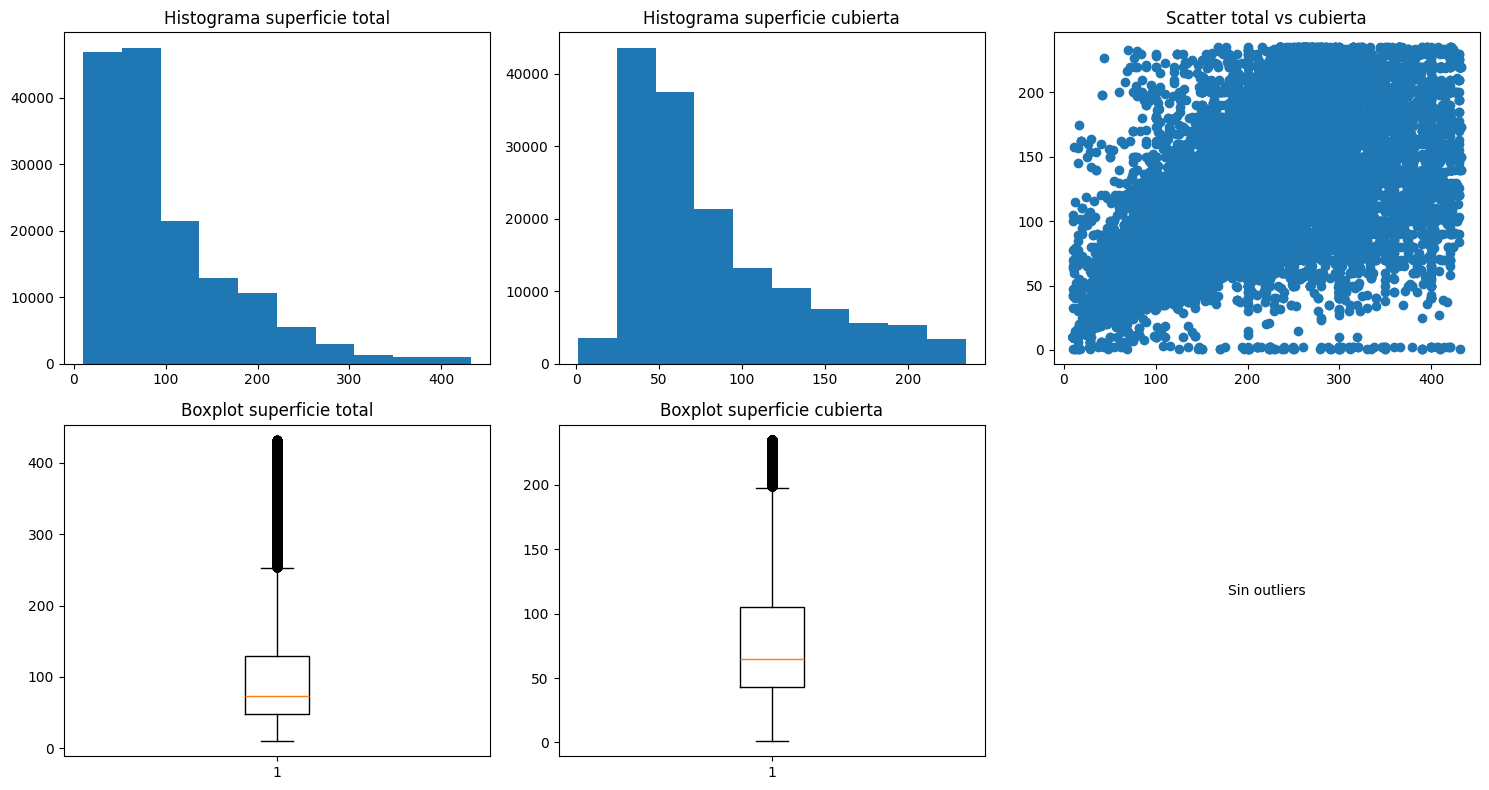

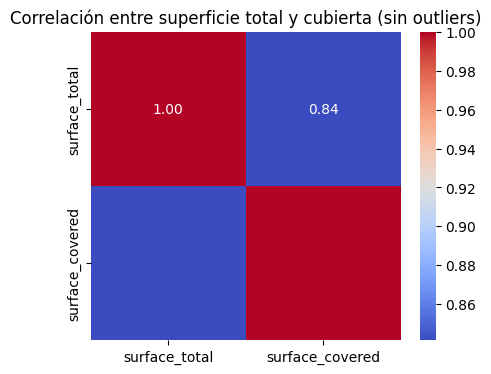

In [14]:
# Gráficos con datos sin outliers

df_no_out = df_filtrado[['surface_total', 'surface_covered']].copy()
df_no_out = df_no_out.dropna()

def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_lim = Q1 - 1.5 * IQR
    upper_lim = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_lim) & (data[column] <= upper_lim)]

df_no_out = remove_outliers_iqr(df_no_out, 'surface_total')
df_no_out = remove_outliers_iqr(df_no_out, 'surface_covered')

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(15, 8))

axes[0, 0].hist(df_no_out['surface_total'])
axes[0, 0].set_title('Histograma superficie total')

axes[0, 1].hist(df_no_out['surface_covered'])
axes[0, 1].set_title('Histograma superficie cubierta')

axes[0, 2].scatter(df_no_out['surface_total'], df_no_out['surface_covered'])
axes[0, 2].set_title('Scatter total vs cubierta')

axes[1, 0].boxplot(df_no_out['surface_total'])
axes[1, 0].set_title('Boxplot superficie total')

axes[1, 1].boxplot(df_no_out['surface_covered'])
axes[1, 1].set_title('Boxplot superficie cubierta')

axes[1, 2].text(0.5, 0.5, 'Sin outliers', ha='center', va='center')
axes[1, 2].set_axis_off()

plt.tight_layout()
plt.show()

# ---- Matriz de correlación ----
plt.figure(figsize=(5, 4))
sns.heatmap(df_no_out.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlación entre superficie total y cubierta (sin outliers)")
plt.show()


Conclusiones Variables Superficie: surface_total y surface_covered

- Las 2 variables tienen muchos nulos, más del 50%
- Existen valores extremos (200.000m2 y 1.350.000m2 respectivamente)
- Existen inconsistencias donde los m2 de superficie total es menor a la superficie cubierta
- Existen valores negativos (datos erróneos, ya que no puede haber una superficie negativa)
- Existen ceros en la variable surface_total
- La mediana es de 100m2 de superficie descubierta y 78m2 cubeirta

In [15]:
# ==============================
# Análisis variables rooms, bedrooms, bathrooms
# ==============================

# ---- 1) Análisis descriptivo ----
variables = ['rooms', 'bedrooms', 'bathrooms']

print("===== Análisis descriptivo =====")
print(df_filtrado[variables].describe())

# ---- 2) Cantidad de valores nulos ----
print("\n===== Valores nulos =====")
print(df_filtrado[variables].isna().sum())



===== Análisis descriptivo =====
           rooms   bedrooms  bathrooms
count 242,417.00 200,140.00 315,319.00
mean        2.94       2.16       1.73
std         1.58       2.87       1.07
min         1.00      -3.00       1.00
25%         2.00       1.00       1.00
50%         3.00       2.00       1.00
75%         4.00       3.00       2.00
max        40.00     900.00      20.00

===== Valores nulos =====
rooms        152224
bedrooms     194501
bathrooms     79322
dtype: int64


In [16]:
# Posibles inconsistencias

inconsistencia_1 = (df_filtrado['bathrooms'] > df_filtrado['rooms']).sum() 
inconsistencia_2 = (df_filtrado['bedrooms'] > df_filtrado['rooms']).sum() 
inconsistencia_3 = (df_filtrado['bathrooms'] > df_filtrado['bedrooms']).sum()

print(inconsistencia_1)
print(inconsistencia_2)
print(inconsistencia_3)

3192
356
19855


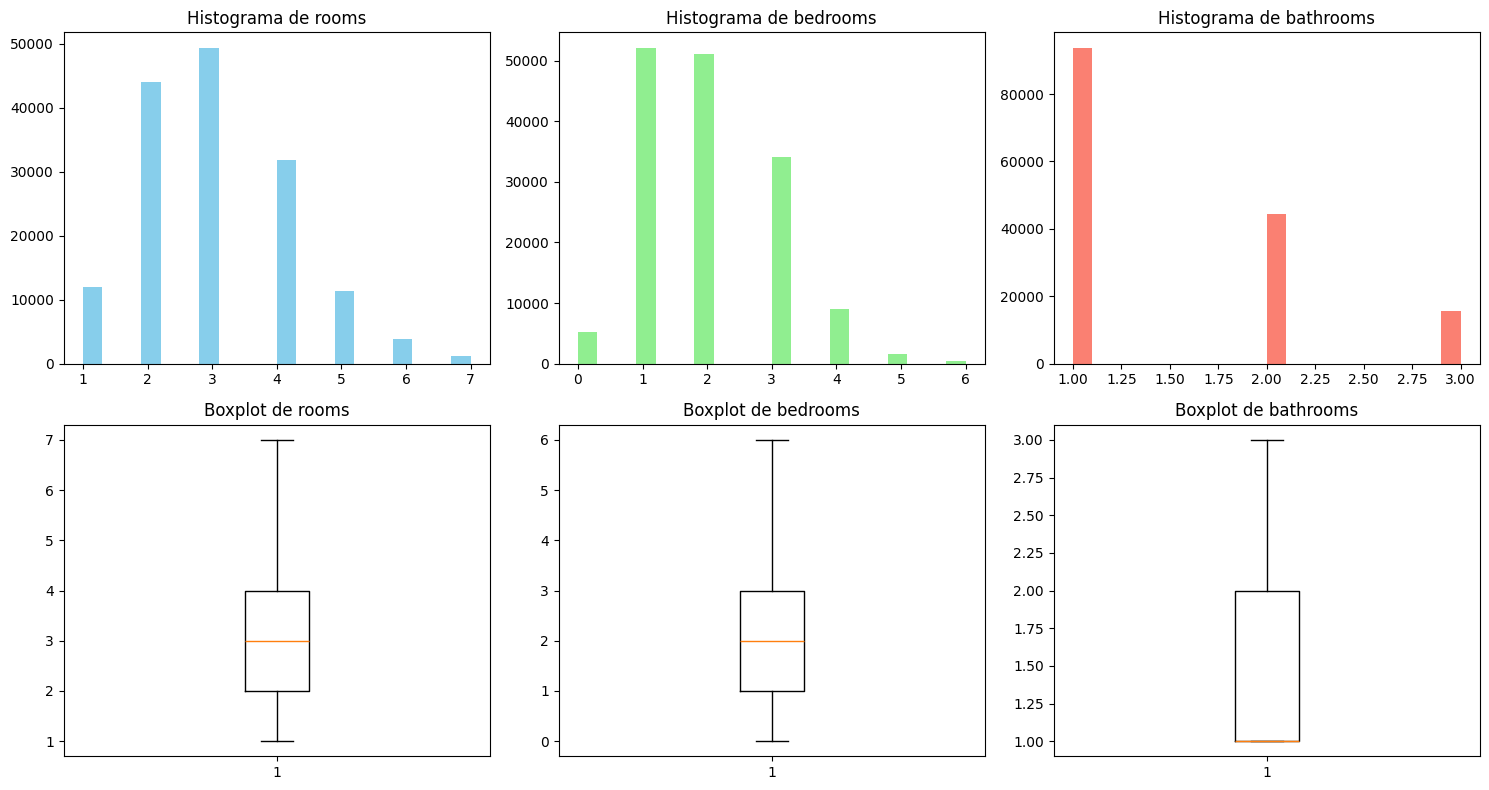

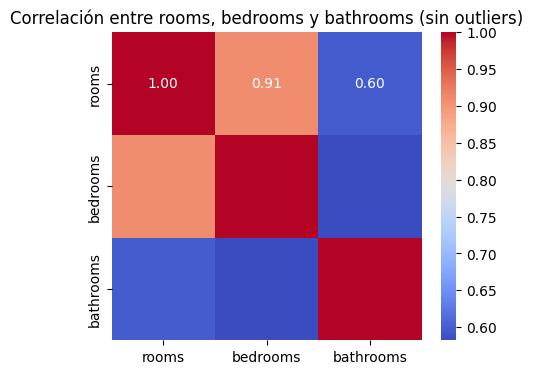

In [17]:
# Gráficos solo con datos sin outliers

df_no_out = df_filtrado[['rooms', 'bedrooms', 'bathrooms']].copy()
df_no_out = df_no_out.dropna()

def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_lim = Q1 - 1.5 * IQR
    upper_lim = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_lim) & (data[column] <= upper_lim)]


for col in ['rooms', 'bedrooms', 'bathrooms']:
    df_no_out = remove_outliers_iqr(df_no_out, col)


# ---- Gráficos ----
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Histogramas
axes[0, 0].hist(df_no_out['rooms'], bins=20, color='skyblue')
axes[0, 0].set_title('Histograma de rooms')

axes[0, 1].hist(df_no_out['bedrooms'], bins=20, color='lightgreen')
axes[0, 1].set_title('Histograma de bedrooms')

axes[0, 2].hist(df_no_out['bathrooms'], bins=20, color='salmon')
axes[0, 2].set_title('Histograma de bathrooms')

# Boxplots
axes[1, 0].boxplot(df_no_out['rooms'])
axes[1, 0].set_title('Boxplot de rooms')

axes[1, 1].boxplot(df_no_out['bedrooms'])
axes[1, 1].set_title('Boxplot de bedrooms')

axes[1, 2].boxplot(df_no_out['bathrooms'])
axes[1, 2].set_title('Boxplot de bathrooms')

plt.tight_layout()
plt.show()

# ---- Matriz de correlación ----
plt.figure(figsize=(5, 4))
sns.heatmap(df_no_out.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlación entre rooms, bedrooms y bathrooms (sin outliers)")
plt.show()

Conclusiones de las Variables rooms, bedrooms, bathrooms

- Las variables rooms y bedrooms tienen muchos nulos, del 50% o más
- La variable bathrooms tiene menos nulos, del 20% aproximadamente
- Existen valores extremos (40, 900 y 20 respectivamente)
- Existen posibles inconsistencias: hay 3 mil casos donde la propiedad tienen más baños que ambientes, 300 casos donde hay más habitaciones que ambientes, 19 mil casos donde hay más baños que habitaciones. Estas inconsistencias puede deberse a que corresponden a diferentes tipos de propiedad (no departamento / casa)
- Para la variable bedrooms existen valores negativos (datos erróneos, ya que no puede haber una propiedad con habitaciones en negativo)
- La mediana es de 3 ambientes, 2 habitaciones y 1 baño.

In [18]:
# ==============================
# Análisis variables place_name, state_name, lat, lon
# ==============================

# ---- 1) Análisis descriptivo ----
variables = ['place_name', 'state_name', 'lat', 'lon']

print("===== Análisis descriptivo =====")
print(df_filtrado[variables].describe())

# ---- 2) Cantidad de valores nulos ----
print("\n===== Valores nulos =====")
print(df_filtrado[variables].isna().sum())

===== Análisis descriptivo =====
             lat        lon
count 331,477.00 331,923.00
mean      -58.50     -34.62
std         0.62       0.55
min      -180.00     -53.79
25%       -58.57     -34.67
50%       -58.45     -34.61
75%       -58.40     -34.57
max       -53.83      85.05

===== Valores nulos =====
place_name    21401
state_name        0
lat           63164
lon           62718
dtype: int64


In [19]:
status(df_filtrado[['lat', 'lon', 'state_name', 'place_name']])

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,lat,63164,0.16,0,0.00,137100,float64
1,lon,62718,0.16,0,0.00,136792,float64
2,state_name,0,0.00,0,0.00,4,object
3,place_name,21401,0.05,0,0.00,90,object


In [20]:
freq_states = df_filtrado['state_name'].value_counts()
freq_states_pct = df_filtrado['state_name'].value_counts(normalize=True) * 100

df_estado_resumen = pd.DataFrame({
    'cantidad': freq_states,
    'porcentaje': freq_states_pct.round(2)
})

df_estado_resumen

,cantidad,porcentaje
state_name,,
Capital Federal,169054,42.84
Bs.As. G.B.A. Zona Norte,85377,21.63
Bs.As. G.B.A. Zona Sur,84958,21.53
Bs.As. G.B.A. Zona Oeste,55252,14.00


In [21]:
# ---- Cantidad total de provincias ----
cant_provincias = df_filtrado['state_name'].nunique()

# ---- Cantidad total de localidades ----
cant_localidades = df_filtrado['place_name'].nunique()

# ---- Cantidad de localidades por provincia ----
localidades_por_provincia = (
    df_filtrado.groupby('state_name')['place_name']
    .nunique()
    .sort_values(ascending=False)
)

print("Cantidad total de provincias:", cant_provincias)
print("Cantidad total de localidades:", cant_localidades)
print("\nLocalidades distintas por provincia:")
print(localidades_por_provincia)

Cantidad total de provincias: 4
Cantidad total de localidades: 90

Localidades distintas por provincia:
state_name
Capital Federal             58
Bs.As. G.B.A. Zona Sur      13
Bs.As. G.B.A. Zona Norte    10
Bs.As. G.B.A. Zona Oeste     9
Name: place_name, dtype: int64


In [22]:
# Contar frecuencia de cada place_name
conteo_places = df_filtrado['place_name'].value_counts().reset_index()
conteo_places.columns = ['place_name', 'frecuencia']

# Tomar los 10 más frecuentes
top10_places = conteo_places.head(10)

# Vincular con state_name (tomando el primero que aparece en el dataset)
top10_places = top10_places.merge(
    df_filtrado[['place_name', 'state_name']].drop_duplicates('place_name'),
    on='place_name',
    how='left'
)

print("=== Top 10 localidades más frecuentes con su provincia ===")
print(top10_places)

=== Top 10 localidades más frecuentes con su provincia ===
        place_name  frecuencia                state_name
0         La Plata       26376    Bs.As. G.B.A. Zona Sur
1            Tigre       26281  Bs.As. G.B.A. Zona Norte
2          Palermo       20487           Capital Federal
3  Lomas de Zamora       17107    Bs.As. G.B.A. Zona Sur
4            Pilar       13604  Bs.As. G.B.A. Zona Norte
5            Morón       13142  Bs.As. G.B.A. Zona Oeste
6          Almagro       11395           Capital Federal
7          Escobar       11266  Bs.As. G.B.A. Zona Norte
8        Ituzaingó       11119  Bs.As. G.B.A. Zona Oeste
9         Belgrano       11067           Capital Federal


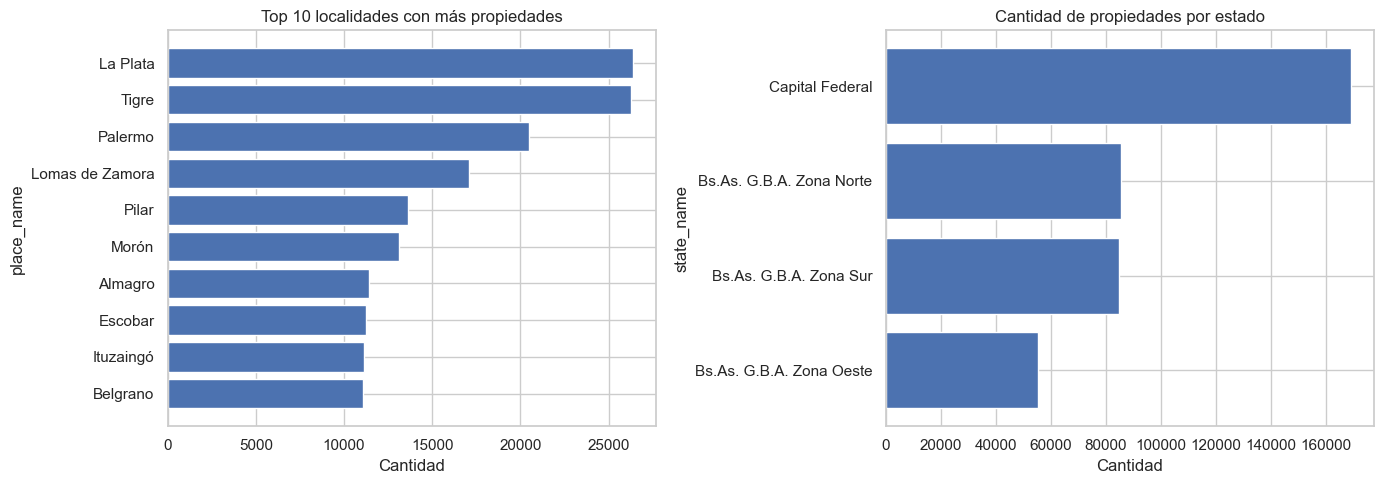

In [23]:
sns.set(style="whitegrid")

# Top 10 localidades
top_places = df_filtrado['place_name'].value_counts().head(10)

# Frecuencia por provincia
states = df_filtrado['state_name'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# --- Gráfico 1: Top place_name ---
axes[0].barh(top_places.index[::-1], top_places.values[::-1])
axes[0].set_title("Top 10 localidades con más propiedades")
axes[0].set_xlabel("Cantidad")
axes[0].set_ylabel("place_name")

# --- Gráfico 2: Frecuencia state_name ---
axes[1].barh(states.index[::-1], states.values[::-1])
axes[1].set_title("Cantidad de propiedades por estado")
axes[1].set_xlabel("Cantidad")
axes[1].set_ylabel("state_name")

plt.tight_layout()
plt.show()

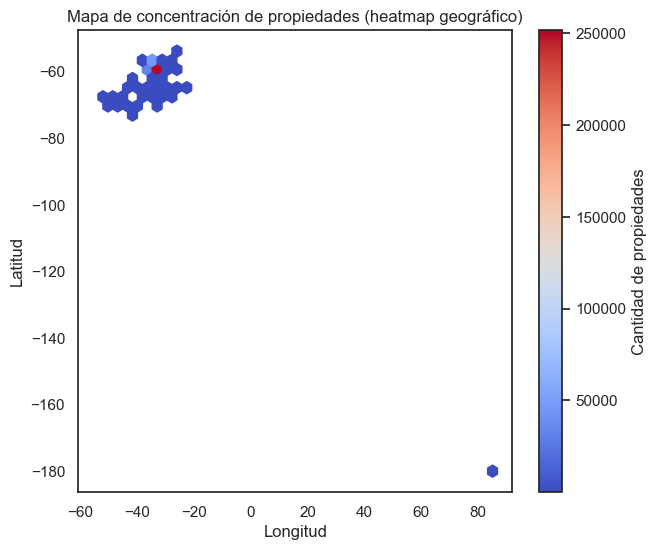

In [24]:
# Mapa de Longitud y Latitud

sns.set(style="white")

plt.figure(figsize=(7,6))

hb = plt.hexbin(
    df_filtrado['lon'],
    df_filtrado['lat'],
    gridsize=40,          # ajustar resolución
    cmap='coolwarm',      # mapa de color
    mincnt=1              # evita mostrar celdas vacías
)

plt.colorbar(hb, label="Cantidad de propiedades")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.title("Mapa de concentración de propiedades (heatmap geográfico)")
plt.show()

In [25]:
pd.set_option('display.float_format', '{:.8f}'.format)

# Top 10 coordenadas más repetidas
top10_coords = (
    df_filtrado.groupby(['lat', 'lon'])
    .size()
    .reset_index(name='frecuencia')
    .sort_values('frecuencia', ascending=False)
    .head(10)
)

# vinculamos cada coordenada con state_name y place_name
top10_con_info = top10_coords.merge(
    df_filtrado[['lat', 'lon', 'state_name', 'place_name']],
    on=['lat', 'lon'],
    how='left'
).drop_duplicates(subset=['lat', 'lon', 'state_name', 'place_name', 'frecuencia'])

print("\nTop 10 con provincia y localidad asociada:")
print(top10_con_info.sort_values('frecuencia', ascending=False))



Top 10 con provincia y localidad asociada:
              lat          lon  frecuencia                state_name  \
0    -58.45581850 -34.57932626         859           Capital Federal   
859  -58.57965850 -34.42508700         566  Bs.As. G.B.A. Zona Norte   
1425 -58.04742336 -34.99533970         562    Bs.As. G.B.A. Zona Sur   
1987 -58.42100800 -34.60824800         548           Capital Federal   
2535 -58.42072790 -34.58976650         281           Capital Federal   
2816 -58.44223220 -34.59337060         274           Capital Federal   
2817 -58.44223220 -34.59337060         274           Capital Federal   
3090 -58.42012240 -34.58800710         265           Capital Federal   
3355 -58.66847610 -34.40264511         264  Bs.As. G.B.A. Zona Norte   
3619 -58.44850902 -34.59852895         260           Capital Federal   
3879 -58.41797000 -34.60381000         255           Capital Federal   

        place_name  
0       Colegiales  
859          Tigre  
1425      La Plata  
1987   

Conclusiones de las Variables place_name, state_name, lat, lon

- Las variables lat, lon tienen 15% de nulos aprox., place_name tiene solo el 5% y state_name no tiene nulos
- Existen valores extremos en la variable lon. En el mapa de lat y lon se ve un outlier. En los valores máximos se ve un lon de 80 que parece ser un dato erróneo.
- El 43% de las propiedades se encuentran en CABA y el 57% en GBA.
- CABA concentra el 65% de los barrios y GBA el 35%
- Las localidades con más propiedades son La Plata y Tigre con más de 25 mil cada una.

In [26]:
# ==============================
# Análisis variable property_type
# ==============================

# ---- 1) Análisis descriptivo ----
variables = ['property_type']

print("===== Análisis descriptivo =====")
print(df_filtrado[variables].describe())

# ---- 2) Cantidad de valores nulos ----
print("\n===== Valores nulos =====")
print(df_filtrado[variables].isna().sum())

===== Análisis descriptivo =====
       property_type
count         394641
unique            10
top     Departamento
freq          160160

===== Valores nulos =====
property_type    0
dtype: int64


In [27]:
# Análisis de frecuencias

freq_property_type = df_filtrado['property_type'].value_counts()
freq_property_type_pct = df_filtrado['property_type'].value_counts(normalize=True) * 100

df_estado_resumen = pd.DataFrame({
    'cantidad': freq_property_type,
    'porcentaje': freq_property_type_pct.round(2)
})

df_estado_resumen

,cantidad,porcentaje
property_type,,
Departamento,160160,40.58000000
Casa,87088,22.07000000
Otro,62817,15.92000000
Lote,36081,9.14000000
PH,20387,5.17000000
Local comercial,10604,2.69000000
Oficina,8295,2.10000000
Cochera,5729,1.45000000
Depósito,2682,0.68000000


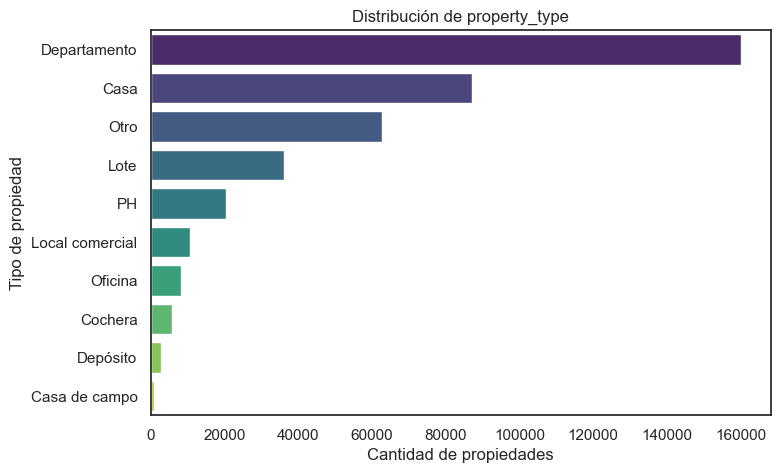

In [28]:
plt.figure(figsize=(8,5))
sns.countplot(data=df_filtrado, y='property_type', order=df_filtrado['property_type'].value_counts().index, palette="viridis")
plt.title("Distribución de property_type")
plt.xlabel("Cantidad de propiedades")
plt.ylabel("Tipo de propiedad")
plt.show()

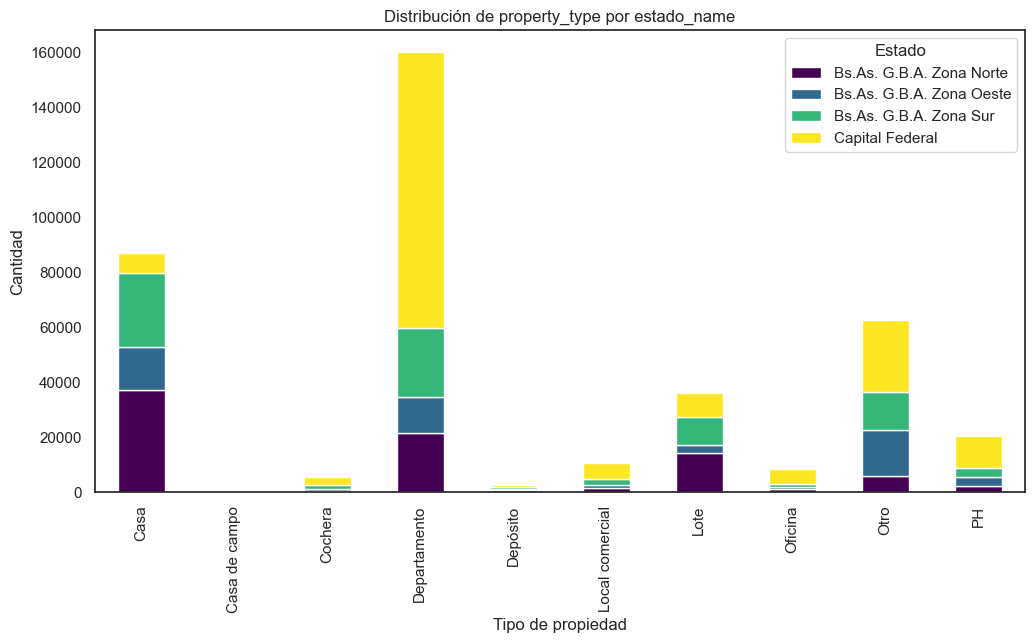

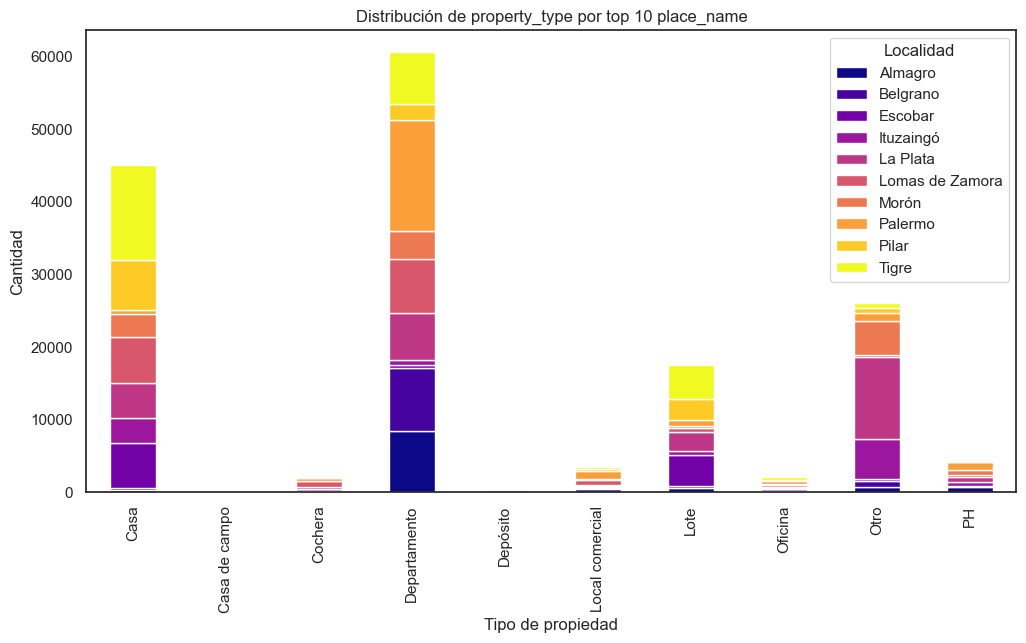

In [29]:
# Tabla cruzada property_type por estado_name
ct_state = pd.crosstab(df_filtrado['property_type'], df_filtrado['state_name'])

# Tabla cruzada property_type por place_name (solo top 10)
top_10_places = df_filtrado['place_name'].value_counts().head(10).index
df_top_places = df_filtrado[df_filtrado['place_name'].isin(top_10_places)]
ct_place = pd.crosstab(df_top_places['property_type'], df_top_places['place_name'])

# ---- Gráfico de barras apiladas property_type por estado_name ----
ct_state.plot(kind='bar', stacked=True, figsize=(12,6), colormap='viridis')
plt.title("Distribución de property_type por estado_name")
plt.xlabel("Tipo de propiedad")
plt.ylabel("Cantidad")
plt.legend(title="Estado")
plt.show()

# ---- Gráfico de barras apiladas property_type por top 10 localidades ----
ct_place.plot(kind='bar', stacked=True, figsize=(12,6), colormap='plasma')
plt.title("Distribución de property_type por top 10 place_name")
plt.xlabel("Tipo de propiedad")
plt.ylabel("Cantidad")
plt.legend(title="Localidad")
plt.show()

Conclusiones de la Variable property_type

- Las variable property_type no tiene nulos
- El 40% de las propiedades corresponden a departamentos, 22% a casas y el 15% a otros
- La mayoría de los departamentos se encuentran en CABA (Palermo) y la mayoría de las casas en GBA (Tigre y Pilar).

In [30]:
# ==============================
# Análisis variable price
# ==============================

# ---- 1) Análisis descriptivo ----
variables = ['price']

print("===== Análisis descriptivo =====")
print(df_filtrado[variables].describe())

# ---- Cantidad de valores nulos ----
print("\n===== Valores nulos =====")
print(df_filtrado[variables].isna().sum())

===== Análisis descriptivo =====
                  price
count   394641.00000000
mean    257160.18612866
std     438778.47087730
min          0.00000000
25%      90000.00000000
50%     150000.00000000
75%     275000.00000000
max   32434232.00000000

===== Valores nulos =====
price    0
dtype: int64


In [31]:
status(df_filtrado['price'])

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,price,0,0.00000000,111,0.00028127,11326,float64


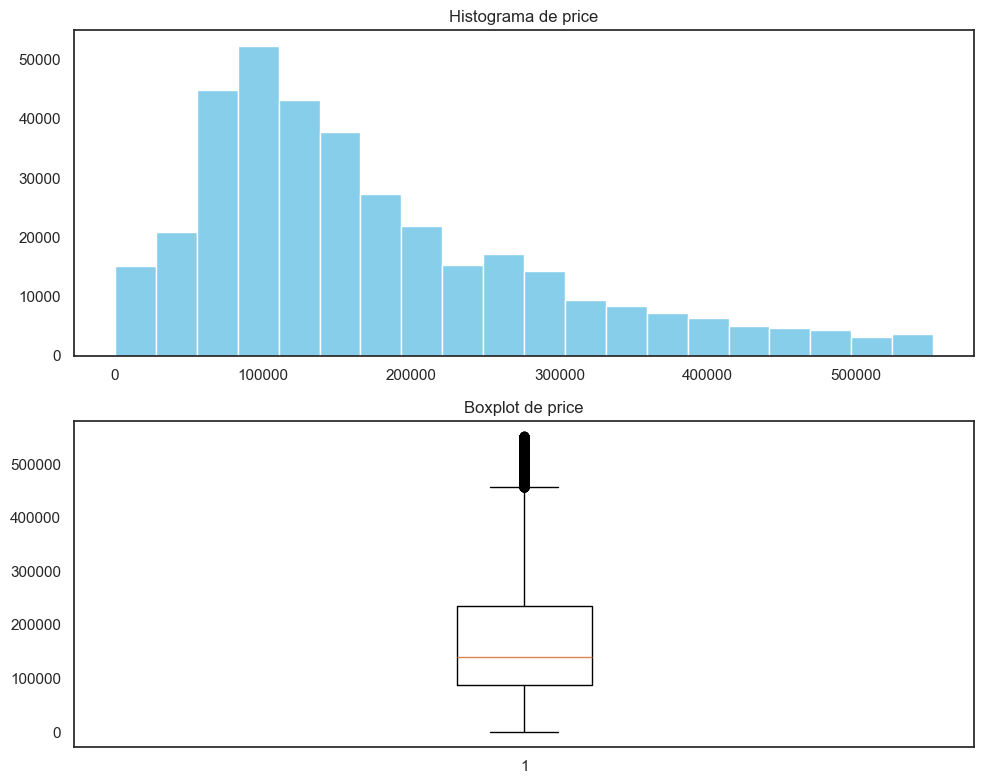

In [32]:
# Gráficos solo con datos sin outliers

# ---- Función para eliminar outliers por IQR ----
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_lim = Q1 - 1.5 * IQR
    upper_lim = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_lim) & (data[column] <= upper_lim)]

# ---- Filtramos price > 0 y eliminamos outliers ----
df_valid = df_filtrado[df_filtrado['price'] > 0].copy()
df_no_out = remove_outliers_iqr(df_valid, 'price')   # <-- acá creamos df_no_out

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Histograma
axes[0].hist(df_no_out['price'], bins=20, color='skyblue')
axes[0].set_title('Histograma de price')

# Boxplot
axes[1].boxplot(df_no_out['price'])
axes[1].set_title('Boxplot de price')

plt.tight_layout()
plt.show()

In [33]:
# ---- Filtramos precios menores a un umbral realista  ----
#df_valid = df_valid[df_valid['price'] >= 5000]

# ---- Precio máximo sin outliers ----
max_price = df_valid['price'].max()
max_row = df_valid[df_valid['price'] == max_price][['place_name', 'state_name', 'property_type', 'surface_total', 'price']]
print("=== Precio máximo (sin outliers) ===")
print(max_row)

# ---- Precio mínimo sin outliers ----
min_price = df_valid['price'].min()
min_row = df_valid[df_valid['price'] == min_price][['place_name', 'state_name', 'property_type', 'surface_total', 'price']]
print("\n=== Precio mínimo (sin outliers) ===")
print(min_row)

=== Precio máximo (sin outliers) ===
       place_name       state_name property_type  surface_total  \
209367    Palermo  Capital Federal  Departamento    43.00000000   

                   price  
209367 32434232.00000000  

=== Precio mínimo (sin outliers) ===
           place_name                state_name property_type  surface_total  \
193328  Vicente López  Bs.As. G.B.A. Zona Norte  Departamento            NaN   

            price  
193328 1.00000000  


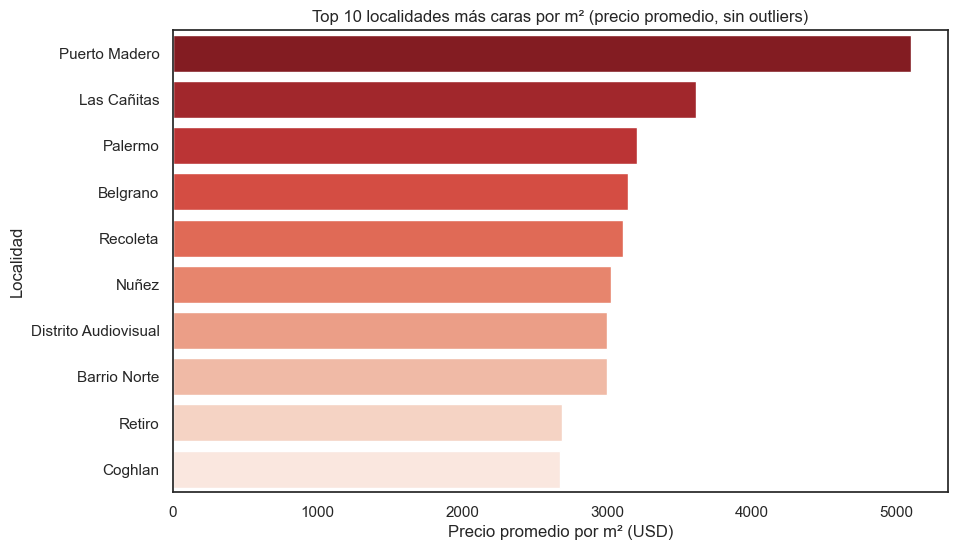

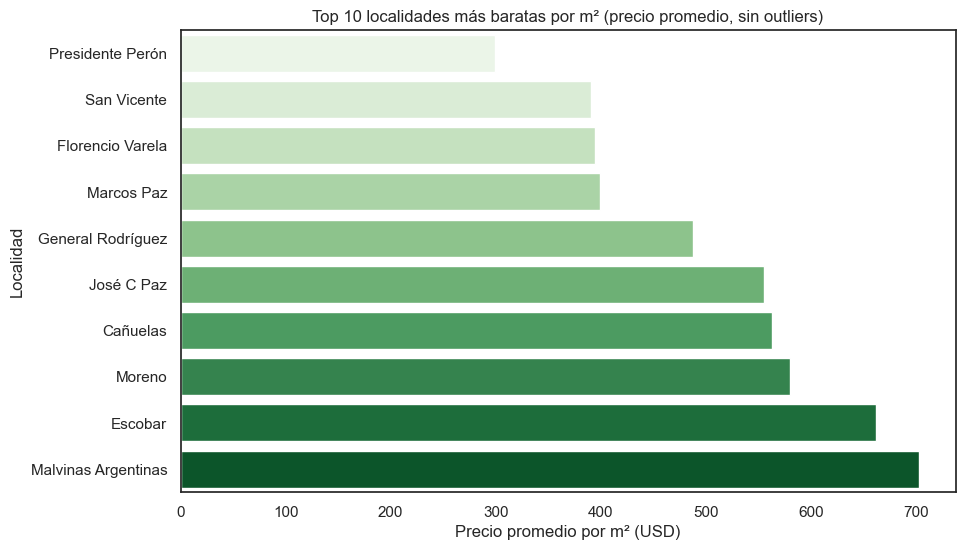

In [34]:
# ==============================
# Análisis variable price vs otras variables 
# ==============================

####### Precio por m2 total ############

# ---- Función para eliminar outliers por IQR ----
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_lim = Q1 - 1.5 * IQR
    upper_lim = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_lim) & (data[column] <= upper_lim)]

# ---- Filtramos y eliminamos filas con surface_total=0 para evitar división por cero ----
df_valid = df_filtrado[df_filtrado['surface_total'] > 0].copy()

# ---- Eliminamos outliers de price ----
df_valid = remove_outliers_iqr(df_valid, 'price')

# ---- Calculamos precio por m2 ----
df_valid['price_m2'] = df_valid['price'] / df_valid['surface_total']

# ---- Top 10 localidades más caras por m2 ----
top10_caras_m2 = (
    df_valid.groupby(['place_name', 'state_name'])['price_m2']
    .mean()
    .reset_index()
    .sort_values('price_m2', ascending=False)
    .head(10)
)

# ---- Top 10 localidades más baratas por m2 ----
top10_baratas_m2 = (
    df_valid.groupby(['place_name', 'state_name'])['price_m2']
    .mean()
    .reset_index()
    .sort_values('price_m2', ascending=True)
    .head(10)
)

# ---- Gráfico Top 10 más caras por m2 ----
plt.figure(figsize=(10,6))
sns.barplot(data=top10_caras_m2, x='price_m2', y='place_name', palette='Reds_r')
plt.title("Top 10 localidades más caras por m² (precio promedio, sin outliers)")
plt.xlabel("Precio promedio por m² (USD)")
plt.ylabel("Localidad")
plt.show()

# ---- Gráfico Top 10 más baratas por m2 ----
plt.figure(figsize=(10,6))
sns.barplot(data=top10_baratas_m2, x='price_m2', y='place_name', palette='Greens')
plt.title("Top 10 localidades más baratas por m² (precio promedio, sin outliers)")
plt.xlabel("Precio promedio por m² (USD)")
plt.ylabel("Localidad")
plt.show()

=== Estadísticos descriptivos de price por property_type ===
                         count            mean             std            min  \
property_type                                                                   
Casa            42615.00000000 271579.13570339 141854.86229819  5000.00000000   
Casa de campo     411.00000000 201665.20681265 119082.95911815  8800.00000000   
Cochera          1895.00000000  25604.58839050  33966.51576060  5000.00000000   
Departamento    99849.00000000 177373.77618203 111124.20238467  5000.00000000   
Depósito         1155.00000000 305352.47619048 159630.58746440  5400.00000000   
Local comercial  5634.00000000 212670.53620873 149458.20853811  6000.00000000   
Lote            15101.00000000 176502.14065294 171000.07976499  5000.00000000   
Oficina          5173.00000000 188642.23390682 130944.06891295  5006.00000000   
Otro             1766.00000000 252347.73782559 159743.94798618  5000.00000000   
PH              13741.00000000 177596.38214104  

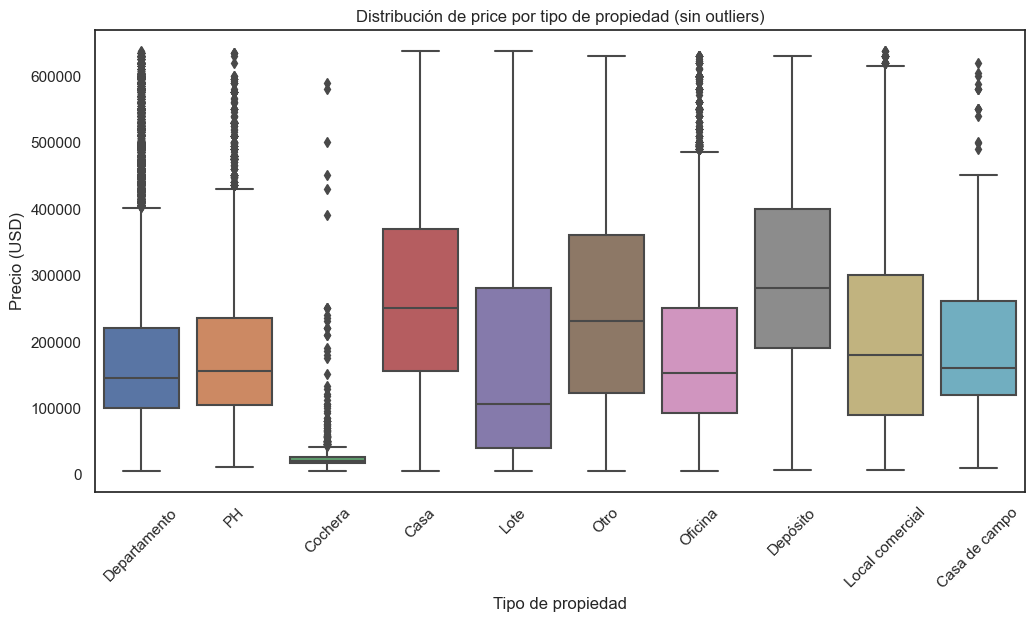

c:\Users\USER\Desktop\Escuela de Datos Vivos\edv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\USER\Desktop\Escuela de Datos Vivos\edv\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USER\Desktop\Escuela de Datos Vivos\edv\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USER\Desktop\Escuela de Dat

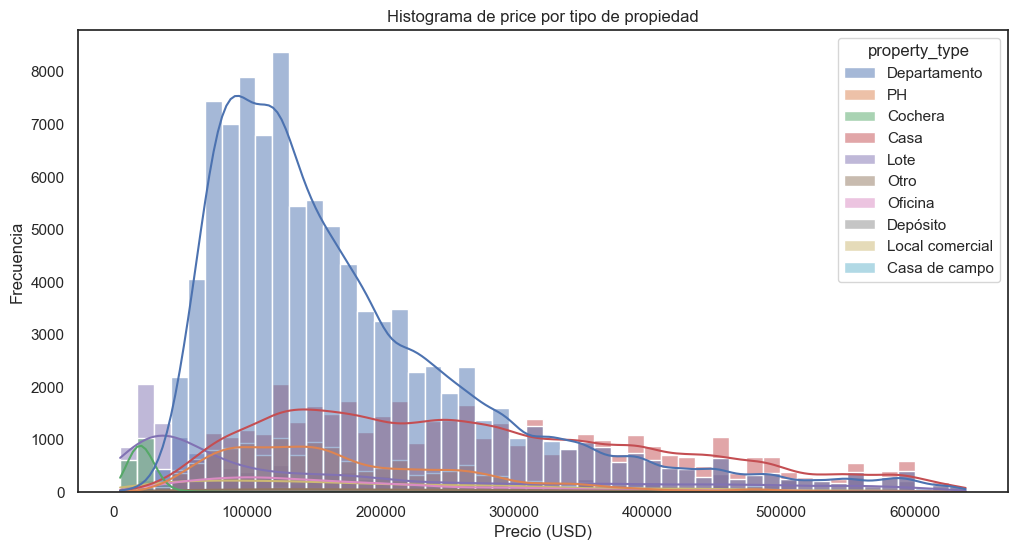

In [35]:
# ---- Estadísticos descriptivos por tipo de propiedad ----
desc_property = df_valid.groupby('property_type')['price'].describe()
print("=== Estadísticos descriptivos de price por property_type ===")
print(desc_property)

# ---- Boxplot por tipo de propiedad ----
plt.figure(figsize=(12,6))
sns.boxplot(data=df_valid, x='property_type', y='price')
plt.title('Distribución de price por tipo de propiedad (sin outliers)')
plt.xticks(rotation=45)
plt.ylabel('Precio (USD)')
plt.xlabel('Tipo de propiedad')
plt.show()

# ---- Histograma por tipo de propiedad ----
plt.figure(figsize=(12,6))
sns.histplot(data=df_valid, x='price', hue='property_type', bins=50, kde=True, alpha=0.5)
plt.title('Histograma de price por tipo de propiedad')
plt.xlabel('Precio (USD)')
plt.ylabel('Frecuencia')
plt.show()

Conclusiones de la Variable price

- Las variable price no tiene nulos
- La mediana de la variable price es USD 150.000
- Existen valores extremos y valores en cero o muy bajos
- La localidad más cara por m2 es Puerto Madero y la más barata Presidente Perón
- Los tipos de propiedad más caros son los depósitos y luego las casas. El más barato es la cochera.

In [36]:
# ==============================
# Limpieza y tratamiento de datos
# ==============================

# Verificar duplicados exactos en todas las columnas
duplicados_totales = df_filtrado.duplicated().sum()
print(f"Duplicados exactos (todas las columnas iguales): {duplicados_totales}")

Duplicados exactos (todas las columnas iguales): 0


In [37]:
# Elimino las variables que no voy a usar
df_filtrado_final = df_filtrado.drop(['id', 'ad_type', 'start_date','end_date','created_on',
                          'l4', 'l5', 'l6', 'price_period','title','description','operation_type'], axis=1)

In [38]:
print(df_filtrado_final.columns)

Index(['lat', 'lon', 'country_name', 'state_name', 'place_name', 'rooms',
       'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'currency',
       'property_type', 'price'],
      dtype='object')


In [39]:
# Verificar duplicados exactos en todas las columnas
duplicados_totales2 = df_filtrado_final.duplicated().sum()
print(f"Duplicados exactos (todas las columnas iguales): {duplicados_totales2}")

Duplicados exactos (todas las columnas iguales): 135515


In [40]:
# ---- Eliminar duplicados exactos ----
df_filtrado_final = df_filtrado_final.drop_duplicates()

# ---- Verificar nuevamente ----
duplicados_totales2_post = df_filtrado_final.duplicated().sum()
print(f"Duplicados después de eliminar: {duplicados_totales2_post}")

# ---- Cantidad de registros después de eliminar duplicados ----
total_registros = df_filtrado_final.shape[0]
print(f"Cantidad de registros después de eliminar duplicados: {total_registros}")

Duplicados después de eliminar: 0
Cantidad de registros después de eliminar duplicados: 259126


In [41]:
# Elimino los nulos de variables 'place_name', 'bathrooms', 'lat', 'lon', ya que no tienen un porcentaje alto

# Columnas clave para verificar nulos
columnas_clave = ['place_name', 'bathrooms', 'lat', 'lon']

# Eliminar filas con nulos en esas columnas
df_filtrado_final = df_filtrado_final.dropna(subset=columnas_clave)

# Verificamos que no queden nulos
print("Nulos por columna después de limpiar:")
print(df_filtrado_final[columnas_clave].isnull().sum())

# Cantidad de registros después de eliminar nulos
print(f"\nCantidad de registros después de eliminar nulos: {df_filtrado_final.shape[0]}")

Nulos por columna después de limpiar:
place_name    0
bathrooms     0
lat           0
lon           0
dtype: int64

Cantidad de registros después de eliminar nulos: 180460


In [42]:
# Imputo nulos de las variables 'bedrooms', 'surface_total', 'surface_covered' con la mediana por tipo de propiedad

# Columnas a imputar
columnas_a_imputar = ['bedrooms', 'surface_total', 'surface_covered']

# Recorremos cada columna
for col in columnas_a_imputar:
    # Imputamos nulos por property_type usando la mediana
    df_filtrado_final[col] = df_filtrado_final.groupby('property_type')[col].transform(
        lambda x: x.fillna(x.median())
    )

# Verificamos si quedaron nulos
print("Nulos por columna después de imputar medianas:")
print(df_filtrado_final[columnas_a_imputar].isnull().sum())

# Cantidad de registros después de imputar nulos
print(f"\nCantidad de registros después de imputar nulos: {df_filtrado_final.shape[0]}")

Nulos por columna después de imputar medianas:
bedrooms           0
surface_total      0
surface_covered    0
dtype: int64

Cantidad de registros después de imputar nulos: 180460


In [43]:
# Elimino outliers de surface_total y surface_covered

# ---- Calcular percentiles 0.01 y 0.99 ----
p_low_total, p_high_total = df_filtrado_final['surface_total'].quantile([0.01, 0.99])
p_low_covered, p_high_covered = df_filtrado_final['surface_covered'].quantile([0.01, 0.99])

# ---- Filtrar filas dentro de estos percentiles ----
df_filtrado_final = df_filtrado_final[
    (df_filtrado_final['surface_total'] >= p_low_total) &
    (df_filtrado_final['surface_total'] <= p_high_total) &
    (df_filtrado_final['surface_covered'] >= p_low_covered) &
    (df_filtrado_final['surface_covered'] <= p_high_covered)
]

# ---- Verificamos el resultado ----
print(f"Cantidad de registros después de filtrar percentiles 0.01-0.99: {df_filtrado_final.shape[0]}")
print("Rango de surface_total:", df_filtrado_final['surface_total'].min(), "-", df_filtrado_final['surface_total'].max())
print("Rango de surface_covered:", df_filtrado_final['surface_covered'].min(), "-", df_filtrado_final['surface_covered'].max())

Cantidad de registros después de filtrar percentiles 0.01-0.99: 175224
Rango de surface_total: 26.0 - 1300.0
Rango de surface_covered: 25.0 - 500.0


In [44]:
# Filtramos inconsistencias (sup cubierta > sup total)

# ---- Filtrar casos válidos ----
df_filtrado_final = df_filtrado_final[df_filtrado_final['surface_covered'] <= df_filtrado_final['surface_total']]

# ---- Verificamos ----
inconsistencias = df_filtrado_final[df_filtrado_final['surface_covered'] > df_filtrado_final['surface_total']].shape[0]
print(f"Cantidad de casos inconsistentes después del filtrado: {inconsistencias}")
print(f"Cantidad de registros después de eliminar inconsistencias: {df_filtrado_final.shape[0]}")

Cantidad de casos inconsistentes después del filtrado: 0
Cantidad de registros después de eliminar inconsistencias: 169133


In [45]:
# Elimino Outliers de bedrooms, rooms, bathrooms

# Columnas a filtrar
columnas = ['bedrooms', 'rooms', 'bathrooms']

# Creamos un filtro para cada columna usando percentiles 0.01 y 0.99
for col in columnas:
    p_low, p_high = df_filtrado_final[col].quantile([0.01, 0.99])
    df_filtrado_final = df_filtrado_final[(df_filtrado_final[col] >= p_low) & (df_filtrado_final[col] <= p_high)]

# Verificamos el resultado
for col in columnas:
    print(f"{col}: min={df_filtrado_final[col].min()}, max={df_filtrado_final[col].max()}")
print(f"\nCantidad de registros después de filtrar percentiles 0.01-0.99: {df_filtrado_final.shape[0]}")

bedrooms: min=0.0, max=5.0
rooms: min=1.0, max=7.0
bathrooms: min=1.0, max=4.0

Cantidad de registros después de filtrar percentiles 0.01-0.99: 139177


In [46]:
# Elimino Outliers de lat y lon

# Columnas a filtrar
columnas = ['lat', 'lon']

# Filtrar percentiles 0.01 - 0.99
for col in columnas:
    p_low, p_high = df_filtrado_final[col].quantile([0.01, 0.99])
    df_filtrado_final = df_filtrado_final[(df_filtrado_final[col] >= p_low) & (df_filtrado_final[col] <= p_high)]

# Verificamos el resultado
for col in columnas:
    print(f"{col}: min={df_filtrado_final[col].min()}, max={df_filtrado_final[col].max()}")
print(f"\nCantidad de registros después de filtrar percentiles 0.01-0.99 de LAT y LON: {df_filtrado_final.shape[0]}")

lat: min=-58.8998675, max=-57.949574573
lon: min=-34.9294162376, max=-34.3611265

Cantidad de registros después de filtrar percentiles 0.01-0.99 de LAT y LON: 133699


In [47]:
# Elimino Outliers de price

# Calcular percentiles 0.01 y 0.99 de price
p_low, p_high = df_filtrado_final['price'].quantile([0.01, 0.99])

# Filtrar registros dentro de ese rango
df_filtrado_final = df_filtrado_final[(df_filtrado_final['price'] >= p_low) & (df_filtrado_final['price'] <= p_high)]

# Verificamos el resultado
print(f"Rango de price después de filtrar percentiles 0.01-0.99: {df_filtrado_final['price'].min()} - {df_filtrado_final['price'].max()}")
print(f"Cantidad de registros después del filtrado: {df_filtrado_final.shape[0]}")

Rango de price después de filtrar percentiles 0.01-0.99: 45000.0 - 1000334.0
Cantidad de registros después del filtrado: 131219


In [48]:
# -------------------------
#  Chequeos y limpieza
# -------------------------
print("Filas/columnas iniciales:", df_filtrado_final.shape)

# 1.a eliminar duplicados
n_dup = df_filtrado_final.duplicated().sum()
if n_dup > 0:
    print(f"Eliminando {n_dup} filas duplicadas.")
    df_filtrado_final = df_filtrado_final.drop_duplicates().reset_index(drop=True)
else:
    print("No hay duplicados.")

# 1.b chequear nulos
nulos = df_filtrado_final.isna().sum()
print("Nulos por columna:\n", nulos[nulos>0] if (nulos>0).any() else "No hay nulos según el chequeo")

Filas/columnas iniciales: (131219, 13)
Eliminando 483 filas duplicadas.
Nulos por columna:
 No hay nulos según el chequeo


In [49]:
# Verificar duplicados exactos en todas las columnas
duplicados_totales2 = df_filtrado_final.duplicated().sum()
print(f"Duplicados exactos (todas las columnas iguales): {duplicados_totales2}")

Duplicados exactos (todas las columnas iguales): 0


In [50]:
# ==============================
# Exporto dataset final
# ==============================

df_filtrado_final.to_csv("data/processed.csv", index=False)

print(" Archivo guardado en: data/processed.csv")

 Archivo guardado en: data/processed.csv


In [51]:
# ==============================
# Conclusiones de negocio y Storytelling
# ==============================

# ---- Filtrar filas válidas ----
df_valid = df_filtrado_final[df_filtrado_final['surface_total'] > 0].copy()

# ---- Calcular precio por m2 ----
df_valid['price_m2'] = df_valid['price'] / df_valid['surface_total']

# ---- Función para obtener top N barrios por zona ----
def top_barrios_por_zona(df, top_n=3, ascending=False):
    zonas = df['state_name'].unique()
    resultado = {}
    
    for zona in zonas:
        df_zona = df[df['state_name'] == zona]
        top_barrios = (
            df_zona.groupby('place_name')['price_m2']
            .mean()
            .sort_values(ascending=ascending)
            .head(top_n)
        )
        resultado[zona] = top_barrios
    return resultado

# ---- Top 3 barrios más caros por zona ----
top_caros = top_barrios_por_zona(df_valid, top_n=3, ascending=False)

# ---- Top 3 barrios más baratos por zona ----
top_baratos = top_barrios_por_zona(df_valid, top_n=3, ascending=True)

# ---- Mostrar resultados ----
print("🏘️ BARRIOS MÁS CAROS POR ZONA:")
for zona, barrios in top_caros.items():
    print(f"\n📍 {zona}:")
    for barrio, precio in barrios.items():
        print(f"   • {barrio}: ${precio:,.0f}")

print("\n\n🏘️ BARRIOS MÁS BARATOS POR ZONA:")
for zona, barrios in top_baratos.items():
    print(f"\n📍 {zona}:")
    for barrio, precio in barrios.items():
        print(f"   • {barrio}: ${precio:,.0f}")

🏘️ BARRIOS MÁS CAROS POR ZONA:

📍 Capital Federal:
   • Puerto Madero: $5,690
   • Las Cañitas: $3,980
   • Belgrano: $3,437

📍 Bs.As. G.B.A. Zona Sur:
   • San Vicente: $2,208
   • Lomas de Zamora: $1,582
   • Quilmes: $1,496

📍 Bs.As. G.B.A. Zona Norte:
   • Vicente López: $2,616
   • San Isidro: $2,339
   • Tigre: $2,032

📍 Bs.As. G.B.A. Zona Oeste:
   • La Matanza: $1,448
   • Morón: $1,329
   • Tres de Febrero: $1,326


🏘️ BARRIOS MÁS BARATOS POR ZONA:

📍 Capital Federal:
   • Villa Soldati: $880
   • Villa Riachuelo: $1,270
   • Villa Lugano: $1,314

📍 Bs.As. G.B.A. Zona Sur:
   • Florencio Varela: $808
   • Presidente Perón: $843
   • Esteban Echeverría: $1,272

📍 Bs.As. G.B.A. Zona Norte:
   • José C Paz: $701
   • Malvinas Argentinas: $885
   • Escobar: $1,046

📍 Bs.As. G.B.A. Zona Oeste:
   • General Rodríguez: $801
   • Moreno: $821
   • Merlo: $861


c:\Users\USER\Desktop\Escuela de Datos Vivos\edv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


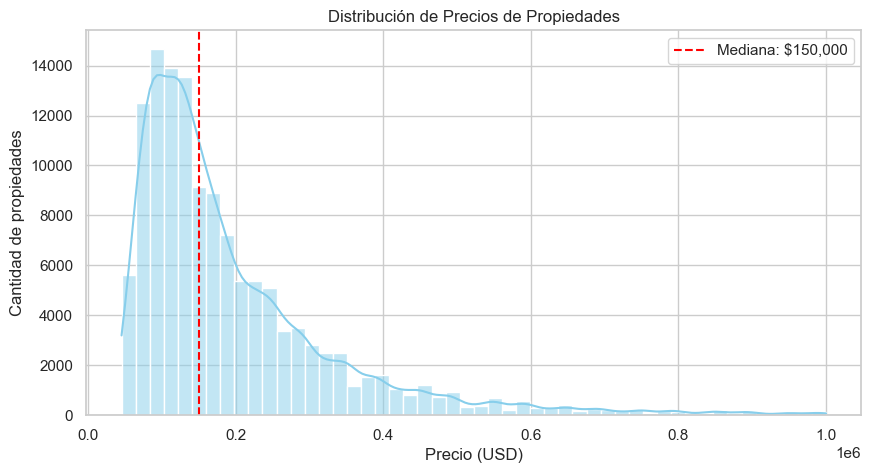

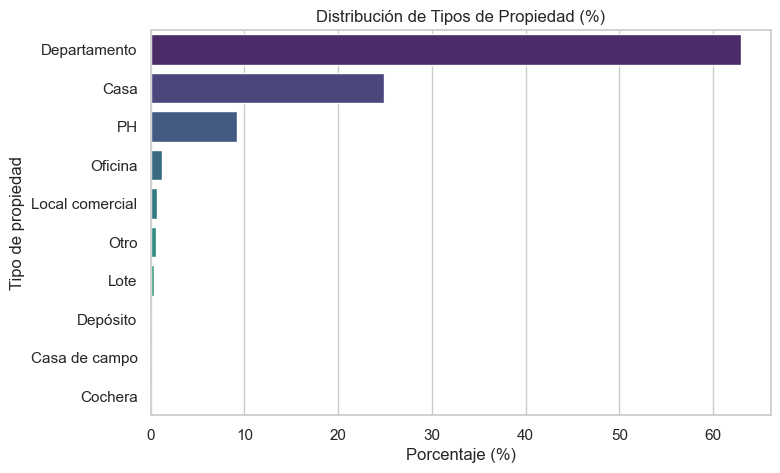

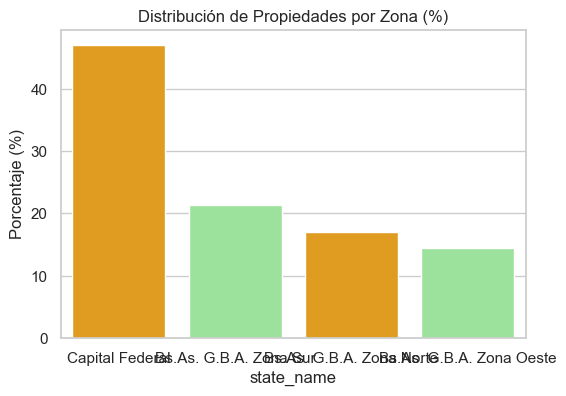

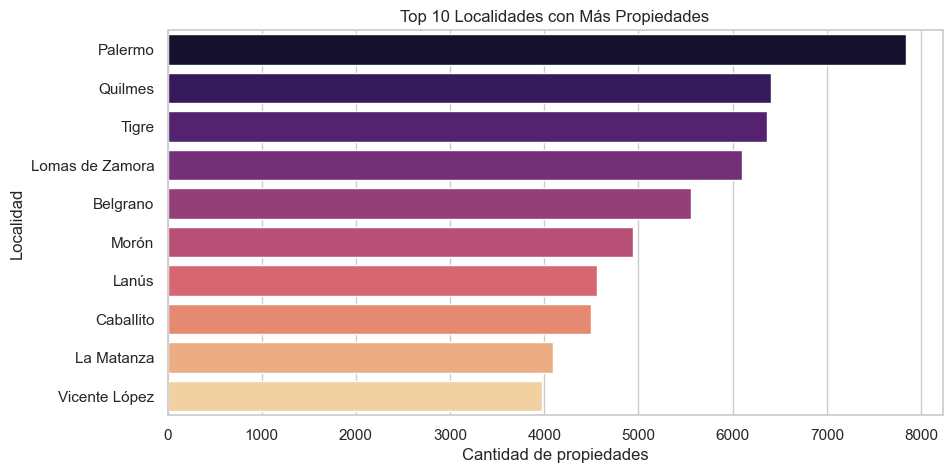

c:\Users\USER\Desktop\Escuela de Datos Vivos\edv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\USER\Desktop\Escuela de Datos Vivos\edv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\USER\Desktop\Escuela de Datos Vivos\edv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


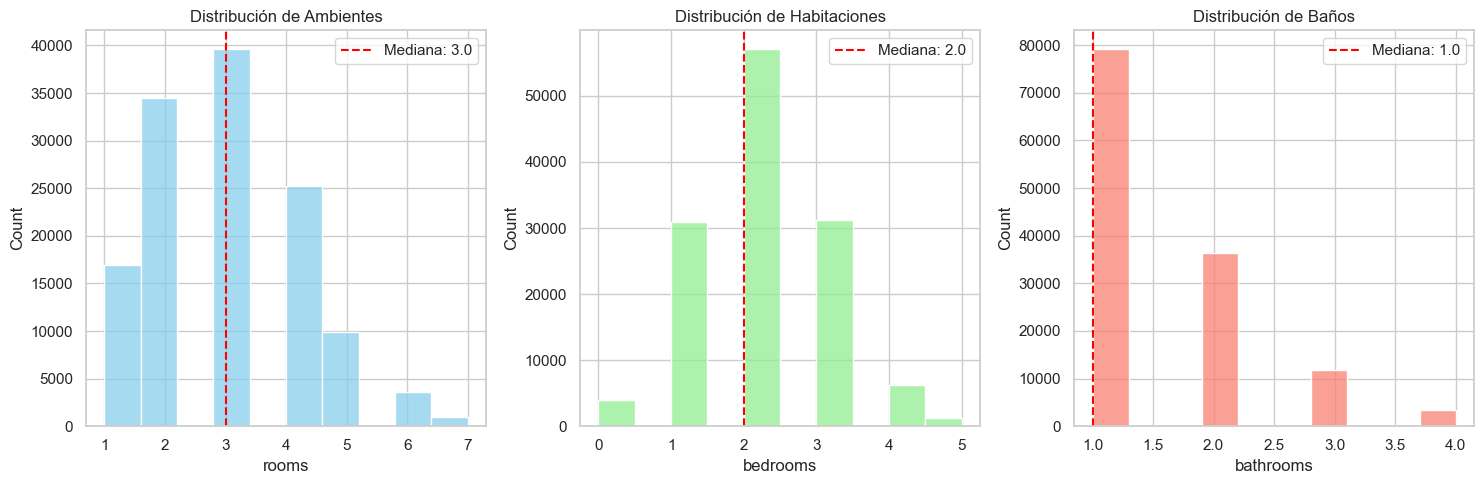

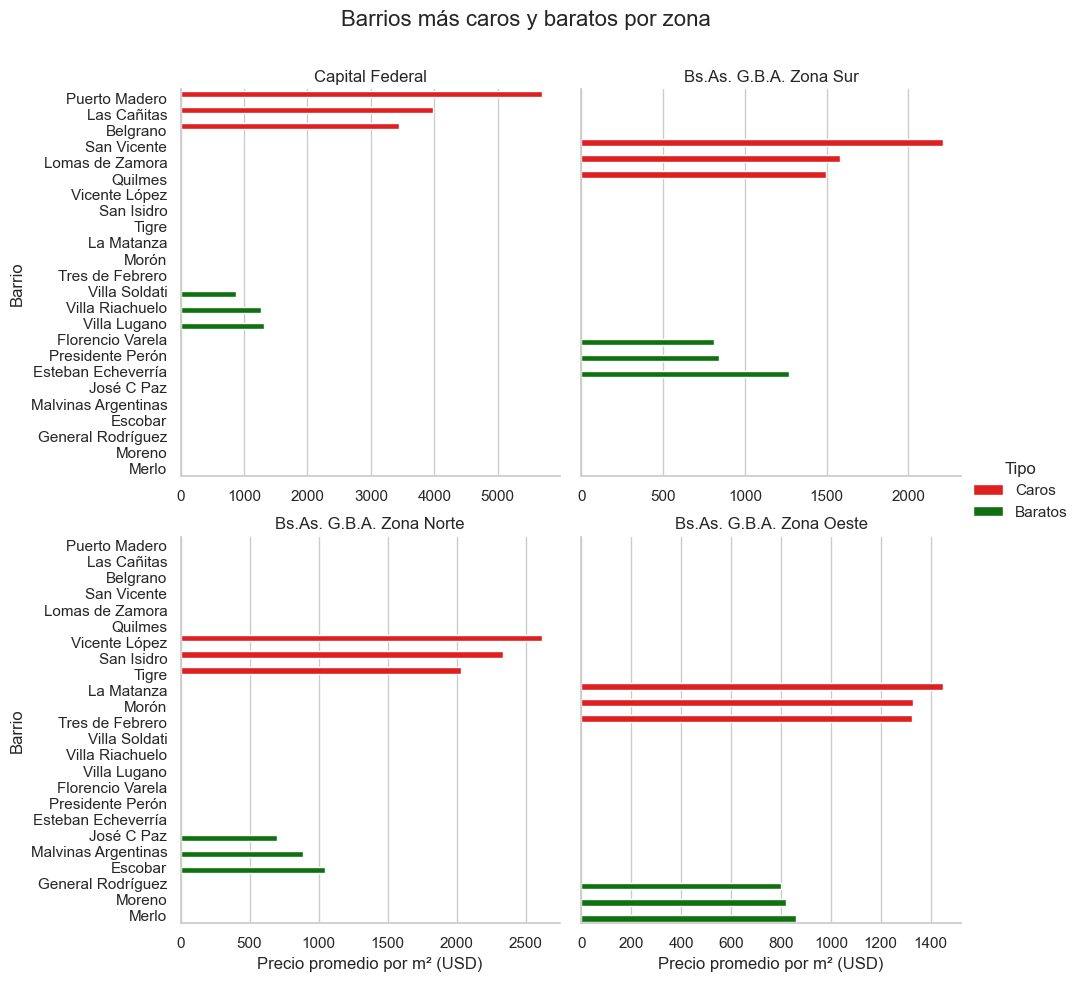

In [52]:
sns.set(style="whitegrid")

# -------------------------------
# 1️⃣ Distribución de precios
# -------------------------------
plt.figure(figsize=(10,5))
sns.histplot(df_filtrado_final['price'], bins=50, kde=True, color='skyblue')
plt.axvline(df_filtrado_final['price'].median(), color='red', linestyle='--', label=f"Mediana: ${df_filtrado_final['price'].median():,.0f}")
plt.title("Distribución de Precios de Propiedades")
plt.xlabel("Precio (USD)")
plt.ylabel("Cantidad de propiedades")
plt.legend()
plt.show()

# -------------------------------
# 2️⃣ Tipos de propiedad
# -------------------------------
prop_counts = df_filtrado_final['property_type'].value_counts(normalize=True)*100
plt.figure(figsize=(8,5))
sns.barplot(x=prop_counts.values, y=prop_counts.index, palette='viridis')
plt.title("Distribución de Tipos de Propiedad (%)")
plt.xlabel("Porcentaje (%)")
plt.ylabel("Tipo de propiedad")
plt.show()

# -------------------------------
# 3️⃣ Distribución geográfica (CABA vs GBA)
# -------------------------------
zone_counts = df_filtrado_final['state_name'].value_counts(normalize=True)*100
plt.figure(figsize=(6,4))
sns.barplot(x=zone_counts.index, y=zone_counts.values, palette=['orange', 'lightgreen'])
plt.title("Distribución de Propiedades por Zona (%)")
plt.ylabel("Porcentaje (%)")
plt.show()

# -------------------------------
# 4️⃣ Localidades con más propiedades
# -------------------------------
top_places = df_filtrado_final['place_name'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_places.values, y=top_places.index, palette='magma')
plt.title("Top 10 Localidades con Más Propiedades")
plt.xlabel("Cantidad de propiedades")
plt.ylabel("Localidad")
plt.show()

# -------------------------------
# 5️⃣ Rooms, Bedrooms y Bathrooms
# -------------------------------
fig, axes = plt.subplots(1,3, figsize=(15,5))
sns.histplot(df_filtrado_final['rooms'], bins=10, kde=False, ax=axes[0], color='skyblue')
axes[0].axvline(df_filtrado_final['rooms'].median(), color='red', linestyle='--', label=f"Mediana: {df_filtrado_final['rooms'].median()}")
axes[0].set_title("Distribución de Ambientes")
axes[0].legend()

sns.histplot(df_filtrado_final['bedrooms'], bins=10, kde=False, ax=axes[1], color='lightgreen')
axes[1].axvline(df_filtrado_final['bedrooms'].median(), color='red', linestyle='--', label=f"Mediana: {df_filtrado_final['bedrooms'].median()}")
axes[1].set_title("Distribución de Habitaciones")
axes[1].legend()

sns.histplot(df_filtrado_final['bathrooms'], bins=10, kde=False, ax=axes[2], color='salmon')
axes[2].axvline(df_filtrado_final['bathrooms'].median(), color='red', linestyle='--', label=f"Mediana: {df_filtrado_final['bathrooms'].median()}")
axes[2].set_title("Distribución de Baños")
axes[2].legend()

plt.tight_layout()
plt.show()

# -------------------------------
# 6️⃣ Barrios más caros y baratos por m2 (Top 3 por zona)
# -------------------------------
# Usamos los diccionarios que ya creamos antes: top_caros y top_baratos
def crear_df_grafico(top_dict, tipo="Caros"):
    rows = []
    for zona, barrios in top_dict.items():
        for barrio, precio in barrios.items():
            rows.append({
                "Barrio": barrio,
                "Zona": zona,
                "Precio_m2": precio,
                "Tipo": tipo
            })
    return pd.DataFrame(rows)

df_caros = crear_df_grafico(top_caros, "Caros")
df_baratos = crear_df_grafico(top_baratos, "Baratos")
df_graf = pd.concat([df_caros, df_baratos])

# Catplot con subplots por zona
g = sns.catplot(
    data=df_graf,
    y="Barrio",
    x="Precio_m2",
    hue="Tipo",
    col="Zona",
    kind="bar",
    palette={"Caros": "red", "Baratos": "green"},
    col_wrap=2,
    height=5,
    sharex=False
)
g.set_titles("{col_name}")
g.set_axis_labels("Precio promedio por m² (USD)", "Barrio")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Barrios más caros y baratos por zona", fontsize=16)
plt.show()

Análisis del Mercado Inmobiliario: Storytelling

- Precio

La mediana del precio de las propiedades es USD 150.000, indicando que la mitad de las propiedades están por debajo de este valor y la otra mitad por encima.

Las localidades más caras por m² son:
Puerto Madero (CABA), reflejando zonas premium con alta demanda y servicios de lujo.

Las propiedades más baratas se encuentran en localidades de GBA.

Tipos de propiedad según precio:
Depósitos y casas son los tipos más caros, reflejando mayor tamaño o funcionalidad.
Las cocheras representan la categoría más económica.

- Tipo de propiedades:

40% son departamentos.
22% son casas.
15% corresponden a otros tipos (depósitos, cocheras, PH, etc.).

- Ubicación según tipo de propiedad:

La mayoría de los departamentos se concentran en CABA, especialmente en Palermo.
La mayoría de las casas se encuentran en GBA, principalmente en Tigre y Pilar.

- Distribución geográfica:

43% de las propiedades se encuentran en CABA y 57% en GBA.
CABA concentra el 65% de los barrios, mientras que GBA tiene el 35% restante.
Localidades con mayor cantidad de propiedades:
Palermo y Tigre, con más de 25.000 propiedades cada una, representan los núcleos más activos del mercado.

- Rooms, Bedrooms, Bathrooms:

La mediana indica que las propiedades típicas cuentan con:
3 ambientes,
2 habitaciones,
1 baño.

 - Conclusión General

El mercado inmobiliario muestra alta heterogeneidad en precio, tipo de propiedad y ubicación.
CABA domina en cantidad de barrios y departamentos, mientras que GBA concentra casas y zonas suburbanas con terrenos más amplios.
Las decisiones de inversión deben balancear alta valorización urbana (CABA) y espacios más económicos y grandes (GBA).
Los precios por m² y la tipología de propiedad permiten identificar claramente los extremos del mercado, siendo clave para estrategias de compra, venta o inversión.